In [32]:
import numpy as np
import pandas as pd
file1=pd.read_csv('RFECV500Rank.csv')
file=pd.read_csv('500CSV.csv')
file1=file1.drop('Unnamed: 0',axis=1)
working=file.drop('Unnamed: 0',axis=1)
X=working.drop('Class',axis=1)
y=working['Class']
X=np.c_[X]
type(X)

numpy.ndarray

In [33]:
cutoff=file1.Feature[0:250]
cutoff=list(cutoff)
for item in range(0,len(cutoff)):
    cutoff[item]=str(cutoff[item])

In [34]:
working=working[cutoff]
working['Class']=y
working.to_csv('250CSV.csv')

In [35]:
X=working.drop('Class',axis=1)
#X=np.c_[X]

In [37]:
X

,886099,886518,888528,885151,887046,886175,888282,886946,885210,887029,...,887261,887189,885221,885080,887262,885061,885223,885057,887263,885060
0,3,0,0,0,1,0,0,1,1,4,...,2,0,1,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,2,1,1,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,2,1,1,0,0,0,1,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,2,1,1,0,0,0,1,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,2,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,3,0,1,1,1,1,0,1,2,3,...,2,0,1,0,0,0,0,0,0,0
610,0,0,0,1,1,0,0,0,0,1,...,2,1,1,0,0,0,0,0,0,0
611,3,0,0,1,1,1,0,1,1,3,...,2,0,1,0,0,0,0,0,0,0
612,0,0,0,1,1,0,0,0,0,0,...,3,0,2,0,0,0,1,0,0,0


In [38]:
#Model and ROC plot
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(47568)
classifier=XGBClassifier(max_depth=3,learning_rate=0.0875,n_estimators=43,loss='exponential')
model= classifier.fit(X, y)
prob=model.predict_proba(X)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y, prob[:, 1])
roc_auc = auc(fpr, tpr)

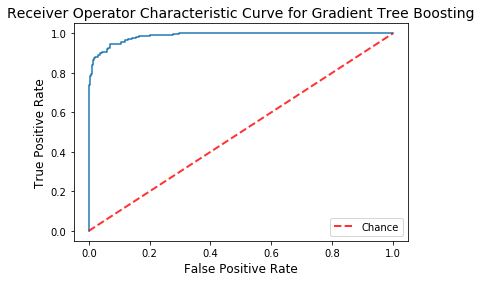

In [39]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',size=12)
plt.ylabel('True Positive Rate',size=12)
plt.title('Receiver Operator Characteristic Curve for Gradient Tree Boosting',size=14)
plt.legend(loc="lower right")

In [40]:
roc_auc = auc(fpr, tpr)
print('The average AUC value is',roc_auc)
myprob=prob[:,1]
myprob1=np.where(myprob>0.37,1,0)
pd.crosstab(y,myprob1,colnames=['Predicted'],rownames=['Actual'])

The average AUC value is 0.9866735986588716


Predicted,0,1
Actual,,
0,286,21
1,16,291


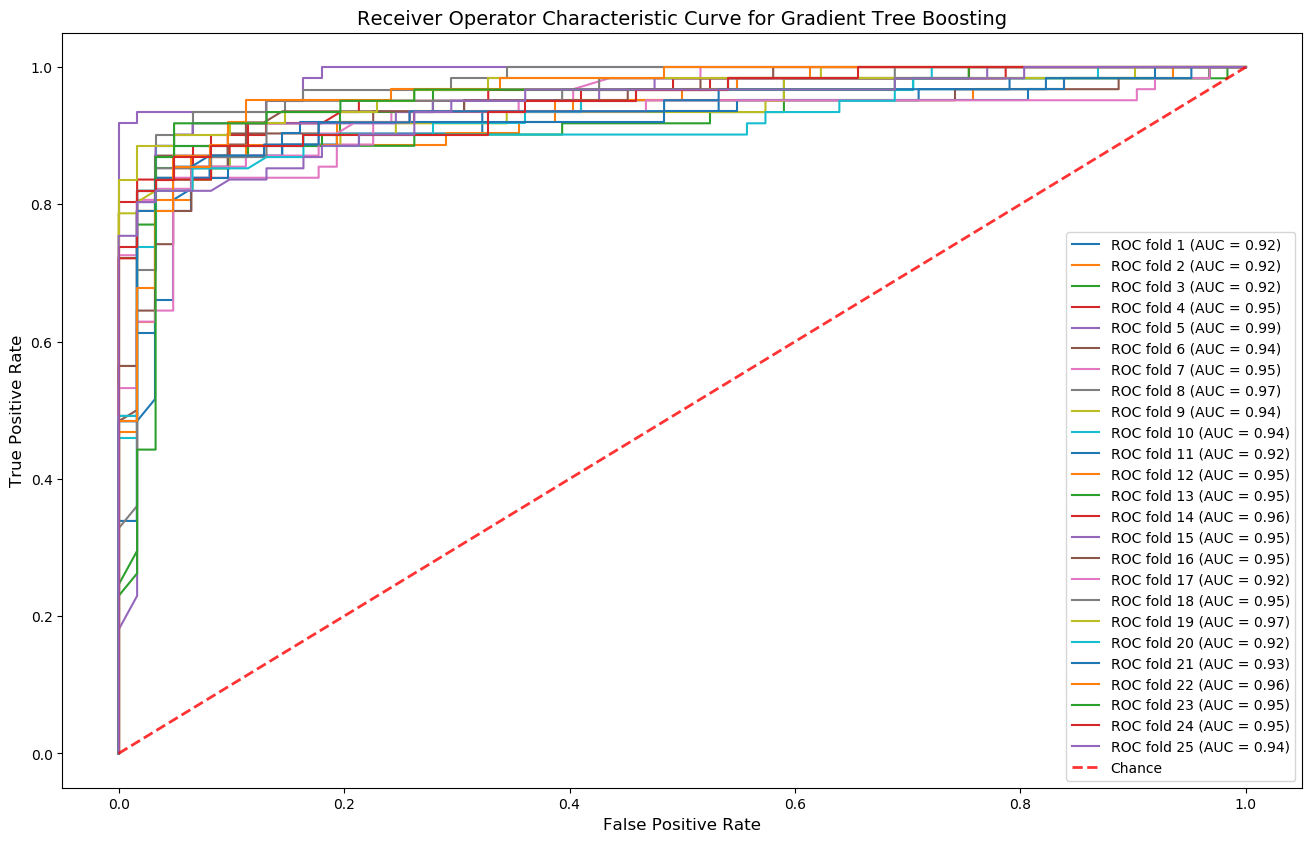

In [8]:
#Model and ROC plot
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(47568)
classifier=XGBClassifier(max_depth=3,learning_rate=0.0875,n_estimators=43,loss='exponential',n_jobs=-1)
aucs=[]
tpr1=[]
fpr1=[]
plt.figure(figsize=(16, 10), dpi=100, facecolor='w', edgecolor='k')
i = 1
for loops in range(0,5):
    cv=StratifiedKFold(n_splits=5,shuffle=True)
    for train, test in cv.split(X, y):
        model= classifier.fit(X[train], y[train])
        prob=model.predict_proba(X[test])
# Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], prob[:, 1])
        tpr=list(tpr)
        fpr=(fpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        tpr1.extend(tpr)
        fpr1.extend(fpr)
        i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
std_auc = np.std(aucs)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',size=12)
plt.ylabel('True Positive Rate',size=12)
plt.title('Receiver Operator Characteristic Curve for Gradient Tree Boosting',size=14)
plt.legend(loc="lower right")
plt.savefig('GTB.png',dpi=100)
plt.show()

In [9]:
print(sum(aucs)/25)
np.std(aucs)

0.944543583804942


0.01779593754954727

Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
F

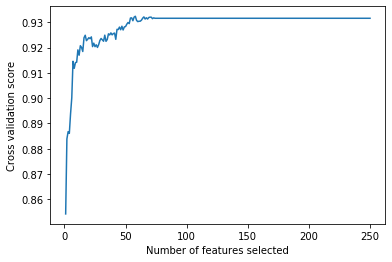

In [41]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfe=RFECV(classifier,1,cv=StratifiedKFold(15),n_jobs=-1,scoring='roc_auc',verbose=1)
fit=rfe.fit(X,y)
print("Optimal number of features : %d" % fit.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.show()

In [44]:
rank=fit.ranking_
imp=pd.DataFrame(list(zip(working.columns.tolist(),rank)),columns=['Feature','Rank'])
imp=imp.sort_values('Rank',ascending=True)
imp
imp.to_csv('RFECV250Rank.csv')